目標:
學習 BASEMAP的進階應用

重點:
導入PANDAS, 利用PANDAS 的數據繪製關係圖

如何自行輸入經緯度繪製所在區域的地圖

學習如何讀取氣象資訊檔: netCDF4

有疑問, 請多提出來, 有專家陪跑

In [2]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ProjError: x, y, z, and time must be same size

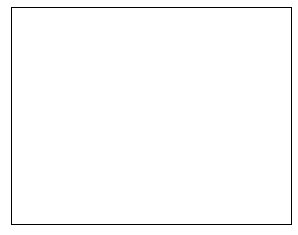

In [3]:
# 繪製基本地圖，選擇繪製的區域，由於繪製美國地圖，故選取如下經緯度，lat_0 和 lon_0 是地圖中心的緯度和經度
# 地圖圖片大小寬度　llcrnrlat=23.41 ,urcrnrlat=45.44
# 地圖大小縱度　llcrnrlon=-118.67,urcrnrlon=-64.52

map = Basemap(projection='stere',lat_0=90,lon_0=-105,
              llcrnrlat=23.41 ,urcrnrlat=45.44,
              llcrnrlon=-118.67,urcrnrlon=-64.52,
              rsphere=6371200.,resolution='l',area_thresh=10000)

map.drawmapboundary()   # 繪製邊界
map.drawstates()        # 繪製州
map.drawcoastlines()    # 繪製海岸線
map.drawcountries()     # 繪製國家
map.drawcounties()      # 繪製縣

parallels = np.arange(0.,90,10.) 
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10) # 繪製緯線

meridians = np.arange(-110.,-60.,10.)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10) # 繪製經線


posi=pd.read_csv("2014_us_cities.csv") # 讀取數據
#取得資料集資訊
posi.info()
posi.head()

# 原始資料有3228組資料，選擇了280個城市的資料
lat = np.array(posi["lat"][0:280]) # 獲取維度之維度值
lon = np.array(posi["lon"][0:280]) # 獲取經度值
pop = np.array(posi["pop"][0:280],dtype=float)  # 獲取人口數，轉化為numpy浮點型

size=(pop/np.max(pop))*1000 # 繪製散點圖時圖形的大小，如果之前pop不轉換為浮點型會沒有大小不一的效果
x,y = map(lon,lat)

map.scatter(x,y,s=size)     # 也可以使用Basemap的methord本身的scatter
plt.title('Population distribution in America')
plt.show()

#由圖可以直觀看出紐約、三藩市、芝加哥、華盛頓是美國人口數量最多的城市。